In [161]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [162]:
# Read the housing_merge.csv
housing_df = pd.read_csv("../Resources/housing_merge.csv")
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,...,total_pop,avg_income,city,population,violent_crime,robbery,prop_crime,burglary,vehicle_theft,crime_rate_per_capita
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,1955,...,13220,68004.765507,Seattle,"721,365",183.1,210.02,2209.8,"1,081.98",503.21,0.013850
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951,...,21760,89057.812500,Seattle,"721,365",183.1,210.02,2209.8,"1,081.98",503.21,0.008415
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965,...,8840,142535.067873,Seattle,"721,365",183.1,210.02,2209.8,"1,081.98",503.21,0.020713
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987,...,12680,236032.492114,Sammamish,"47,158",33.9,2.10,727.3,231.1,27.60,0.002674
4,1225000.0,4,4.50,5420,101930,1.0,0,0,3,2001,...,10030,207522.133599,Redmond,"55,770",64.6,19.70,2137.3,308.4,87.90,0.006441


In [163]:
# One-Hot Encoding for the 'city', 'zipcode" column
df_encoded = pd.get_dummies(housing_df, columns=['city', 'zipcode'])

print(df_encoded)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       231300.0         2       1.00         1180      5650     1.0   
1       538000.0         3       2.25         2570      7242     2.0   
2       604000.0         4       3.00         1960      5000     1.0   
3       510000.0         3       2.00         1680      8080     1.0   
4      1225000.0         4       4.50         5420    101930     1.0   
...          ...       ...        ...          ...       ...     ...   
19945   475000.0         3       2.50         1310      1294     2.0   
19946   360000.0         3       2.50         1530      1131     3.0   
19947   400000.0         4       2.50         2310      5813     2.0   
19948   402101.0         2       0.75         1020      1350     2.0   
19949   325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  yr_built  ...  zipcode_98146  \
0               0     0          3      1955  ...          False   

In [164]:
df_encoded.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'total_pop',
       'avg_income', 'population', 'violent_crime', 'robbery', 'prop_crime',
       'burglary', 'vehicle_theft', 'crime_rate_per_capita', 'city_Auburn',
       'city_Bellevue', 'city_Federal Way', 'city_Kent', 'city_Kirkland',
       'city_Redmond', 'city_Renton', 'city_Sammamish', 'city_Seattle',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98023', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98042', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98074', 'zipcode_98075', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcod

In [165]:
# Drop rows with missing values
df_encoded.dropna(inplace=True)

In [166]:
# Convert 'population' and 'burglary' columns to numeric
df_encoded['population'] = pd.to_numeric(df_encoded['population'], errors='coerce')
df_encoded['burglary'] = pd.to_numeric(df_encoded['burglary'], errors='coerce')

In [167]:
df_encoded.fillna(0, inplace=True)

In [168]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_encoded["price"]

# Separate the X variable, the features
X = df_encoded.drop("price", axis=1)
feature_names = X.columns
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,total_pop,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,2,1.00,1180,5650,1.0,0,0,3,1955,13220,...,False,False,False,False,False,False,True,False,False,False
1,3,2.25,2570,7242,2.0,0,0,3,1951,21760,...,False,False,False,False,False,False,False,False,False,False
2,4,3.00,1960,5000,1.0,0,0,5,1965,8840,...,False,False,False,False,False,False,False,False,False,False
3,3,2.00,1680,8080,1.0,0,0,3,1987,12680,...,False,False,False,False,False,False,False,False,False,False
4,4,4.50,5420,101930,1.0,0,0,3,2001,10030,...,False,False,False,False,False,False,False,False,False,False


In [169]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [170]:
print(X_train.shape)

(14962, 80)


## Machine Learning: Create a Linear Regression Model

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

model.score(X_test, y_test)



0.7898636205834024

In [172]:
# Predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, predictions)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 31301096391.601192
R-squared: 0.7898636205834024


In [173]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78509312, 0.79833121, 0.80873748, 0.79538053, 0.78949021])

In [174]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.300156   0.522010     0.708554  0.106061  0.247592   
bedrooms       0.300156  1.000000   0.515391     0.572160  0.071594  0.154581   
bathrooms      0.522010  0.515391   1.000000     0.752226  0.100152  0.482451   
sqft_living    0.708554  0.572160   0.752226     1.000000  0.212553  0.337182   
sqft_lot       0.106061  0.071594   0.100152     0.212553  1.000000 -0.028321   
...                 ...       ...        ...          ...       ...       ...   
zipcode_98177  0.037430  0.000834   0.001889     0.032486  0.003545 -0.038693   
zipcode_98178 -0.071191 -0.010646  -0.053067    -0.041621 -0.015439 -0.058685   
zipcode_98188 -0.055753  0.003902  -0.023942    -0.023273 -0.004180 -0.035596   
zipcode_98198 -0.076028 -0.026017  -0.046153    -0.040969 -0.003830 -0.051909   
zipcode_98199  0.079828 -0.023798   0.013293     0.013944 -0.033758  0.001831   

               waterfront  

In [175]:
# Drop weak features
df_encoded1 = df_encoded.drop(columns=['condition', 'yr_built', 'sqft_lot', 'population', 'violent_crime', 'total_pop', 'vehicle_theft', 'zipcode_98177', 'zipcode_98168', 'zipcode_98178', 'burglary', 'zipcode_98188', 'floors', 'robbery', 'prop_crime', 'crime_rate_per_capita', 'waterfront', 'view'])
df_encoded1.head()

,price,bedrooms,bathrooms,sqft_living,avg_income,city_Auburn,city_Bellevue,city_Federal Way,city_Kent,city_Kirkland,...,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98198,zipcode_98199
0,231300.0,2,1.00,1180,68004.765507,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570,89057.812500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,604000.0,4,3.00,1960,142535.067873,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,510000.0,3,2.00,1680,236032.492114,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1225000.0,4,4.50,5420,207522.133599,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
df_encoded1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'avg_income',
       'city_Auburn', 'city_Bellevue', 'city_Federal Way', 'city_Kent',
       'city_Kirkland', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98023', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98042',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_981

In [177]:
# Separate the data into labels and features

# Separate the y variable, the labels
y1 = df_encoded1["price"]

# Separate the X variable, the features
X1 = df_encoded1.drop("price", axis=1)
feature_names1 = X1.columns

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1, y1, random_state=1)

model1 = LinearRegression()
# Fit the model to the training data
model1.fit(X1_train1, y1_train1)

model1.score(X1_test1, y1_test1)

# Predictions on the test set
predictions1 = model1.predict(X1_test1)

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y1_test1, predictions1)

# Calculate R-squared (Coefficient of Determination)
r2_1 = r2_score(y1_test1, predictions1)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared: {r2_1}")

Mean Squared Error (MSE): 37120653758.393166
R-squared: 0.7507946787302031


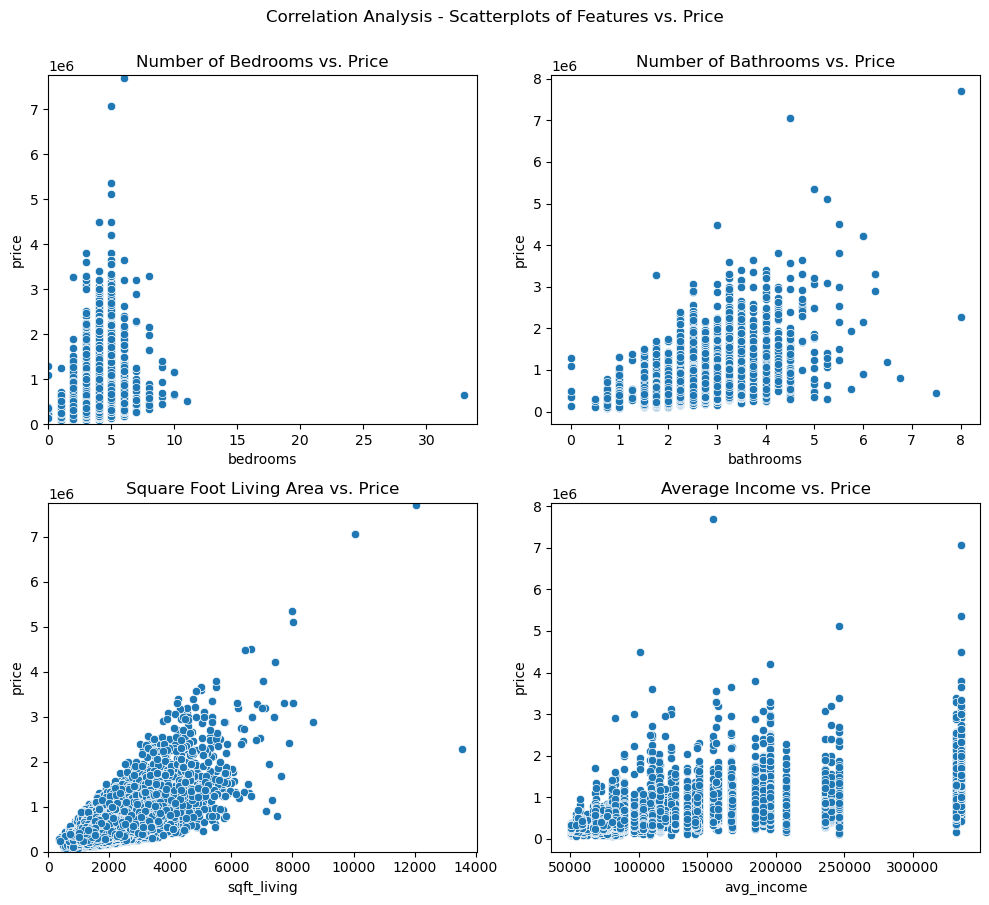

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Correlation Analysis - Scatterplots of Features vs. Price')

sns.scatterplot(ax=axes[0, 0], x= 'bedrooms', y='price', data=df_encoded1)
axes[0, 0].set_title('Number of Bedrooms vs. Price')
# Set axis limits to start from 0
axes[0, 0].set_xlim(0, df_encoded1['bedrooms'].max() + 1)
axes[0, 0].set_ylim(0, df_encoded1['price'].max() + 50000)
axes[1, 1].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.scatterplot(ax=axes[0, 1], x= 'bathrooms', y='price', data=df_encoded1)
axes[0, 1].set_title('Number of Bathrooms vs. Price')

sns.scatterplot(ax=axes[1, 0], x= 'sqft_living', y='price', data=df_encoded1)
axes[1, 0].set_title('Square Foot Living Area vs. Price')
axes[1, 0].set_xlim(0, df_encoded1['sqft_living'].max() + 500)
axes[1, 0].set_ylim(0, df_encoded1['price'].max() + 50000)

sns.scatterplot(ax=axes[1, 1], x= 'avg_income', y='price', data=df_encoded1)
axes[1, 1].set_title('Average Income vs. Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])

# Set the suptitle in the middle of the edge and the chart
fig.suptitle('Correlation Analysis - Scatterplots of Features vs. Price', y=0.93)

# Save the plot to a file (e.g., as a PNG image)
plt.savefig('../Resources/correlation_analysis_scatterplots.png', format='png')

plt.show()

In [179]:
correlation_matrix1 = df_encoded1.corr()
print(correlation_matrix1)

                  price  bedrooms  bathrooms  sqft_living  avg_income  \
price          1.000000  0.300156   0.522010     0.708554    0.605129   
bedrooms       0.300156  1.000000   0.515391     0.572160    0.137863   
bathrooms      0.522010  0.515391   1.000000     0.752226    0.252256   
sqft_living    0.708554  0.572160   0.752226     1.000000    0.340995   
avg_income     0.605129  0.137863   0.252256     0.340995    1.000000   
...                 ...       ...        ...          ...         ...   
zipcode_98148 -0.036600 -0.014029  -0.020328    -0.026234   -0.054911   
zipcode_98155 -0.049065 -0.010555  -0.053283    -0.045138   -0.069657   
zipcode_98166 -0.024941 -0.001336  -0.025842     0.000860   -0.039560   
zipcode_98198 -0.076028 -0.026017  -0.046153    -0.040969   -0.110768   
zipcode_98199  0.079828 -0.023798   0.013293     0.013944    0.118706   

               city_Auburn  city_Bellevue  city_Federal Way  city_Kent  \
price            -0.211501       0.366141        

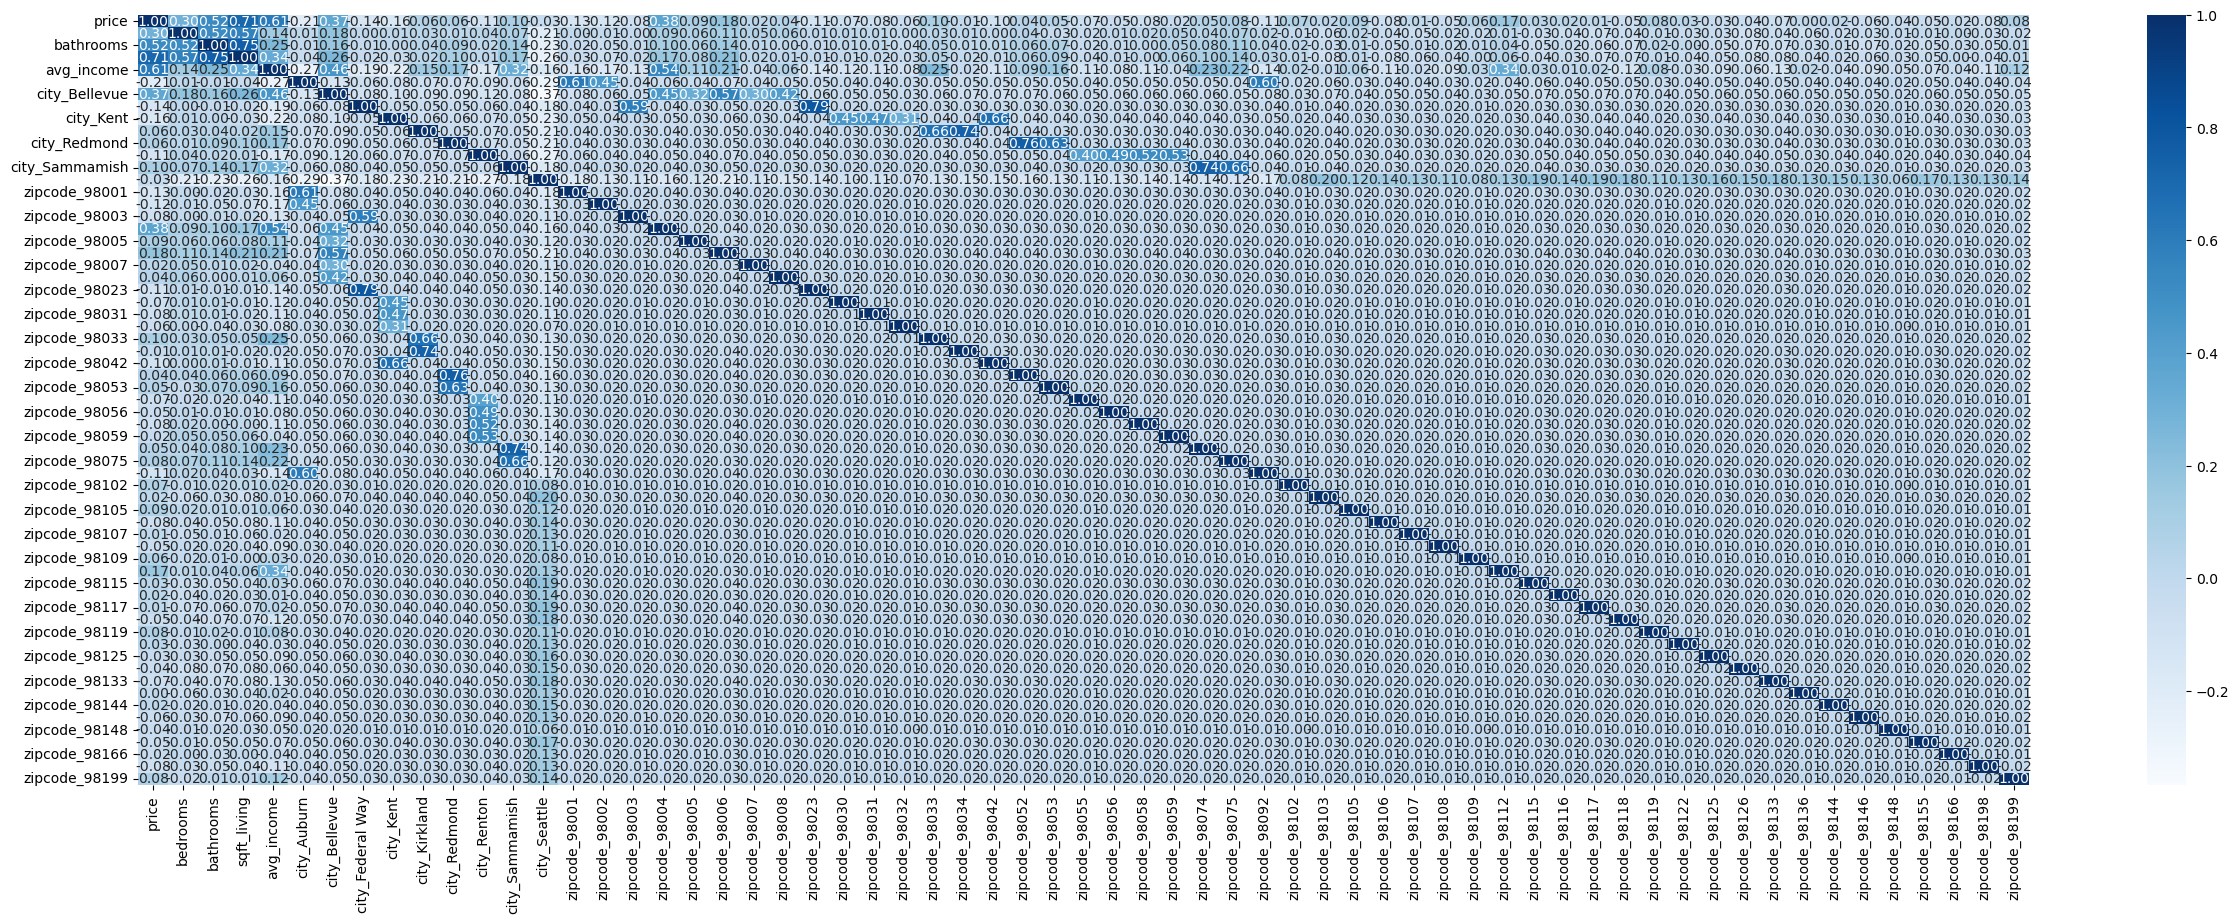

In [180]:
plt.figure(figsize=(30.5, 10))  
sns.heatmap(correlation_matrix1, annot=True, cmap='Blues', fmt=".2f")
# Save the plot to a file (e.g., as a PNG image)
plt.savefig('../Resources/correlation_analysis_heatmap.png', format='png')
plt.show()

In [181]:
df_encoded1.head()

,price,bedrooms,bathrooms,sqft_living,avg_income,city_Auburn,city_Bellevue,city_Federal Way,city_Kent,city_Kirkland,...,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98198,zipcode_98199
0,231300.0,2,1.00,1180,68004.765507,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570,89057.812500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,604000.0,4,3.00,1960,142535.067873,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,510000.0,3,2.00,1680,236032.492114,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1225000.0,4,4.50,5420,207522.133599,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearchcv(X1, y1):
    # Define models and their parameter grids
    algos = {'linear_regression': {
        'model': LinearRegression(),
        'params': {}  # Remove 'normalize' parameter
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }}

    # Set up the cross-validation
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    scores = []
    
    # Perform GridSearchCV for each algorithm
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        
        # If the model is linear regression, we need to scale the features
        if algo_name == 'linear_regression':
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X1)  # Standardize the data
            gs.fit(X_scaled, y1)  # Fit the scaled data
        else:
            gs.fit(X1, y1)  # Fit without scaling for decision tree
        
        # Store the results in a dictionary
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    # Convert the scores list to a DataFrame for better visualization
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
best_models = find_best_model_using_gridsearchcv(X1,y1)
best_models

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+14, tolerance: 2.324e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.176e+14, tolerance: 2.407e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e+14, toler

,model,best_score,best_params
0,linear_regression,0.744857,{}
1,lasso,0.744803,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.671300,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
# Drop weak features
df_encoded2 = df_encoded.drop(columns=['condition', 'yr_built', 'sqft_lot', 'population', 'violent_crime', 'total_pop', 'vehicle_theft', 'zipcode_98177', 'zipcode_98168', 'zipcode_98178', 'burglary', 'zipcode_98188', 'floors', 'robbery', 'prop_crime', 'crime_rate_per_capita', 'waterfront', 'view'])
df_encoded1.head()

In [59]:
# Drop price from encoded
df_encoded1_drop = df_encoded1.drop(columns=['price'])

In [60]:
# Export clean data to csv 
df_encoded1_drop.to_csv('Resources/df_encoded1_drop.csv', index=False)

In [61]:
# Save the train model to a. pkl file
import joblib
model_path = '../Anh/optimized_predict_pricing.pkl'
joblib.dump(model1, model_path)
print(f"Model saved at {model_path}")

Model saved at ../Anh/optimized_predict_pricing.pkl


In [62]:
import json
columns = {
    'data_columns': [col.lower() for col in X1.columns]
}
with open ("column.json", "w") as f:
    f.write(json.dumps(columns))

In [63]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('optimized_predict_pricing.pkl')

# Load the dataset for reference (you need to provide the path to your dataset)
df_encoded1 = pd.read_csv('Resources/df_encoded1_drop.csv')  

# Function to handle default values for user inputs
def get_user_input(prompt, default_value, value_type):
    user_input = input(f"{prompt} (default {default_value}): ")
    if not user_input:
        return value_type(default_value)
    try:
        return value_type(user_input)
    except ValueError:
        print(f"Invalid input. Using default value: {default_value}")
        return value_type(default_value)
# Preprocessing function (to ensure consistency with model training)
def preprocess_input_data(input_data):
    # One-hot encode the 'city' and 'zipcode' columns, similar to training time
    input_data_encoded = pd.get_dummies(input_data, columns=['city', 'zipcode'], drop_first=True)
    
    # Get all the columns from the original dataset used for training, including one-hot encoding
    model_columns = list(df_encoded1_drop.columns)
    
    # Ensure all columns are present (add missing columns with 0)
    missing_cols = set(model_columns) - set(input_data_encoded.columns)
    for col in missing_cols:
        input_data_encoded[col] = 0  # Add missing columns with 0
    
    # Ensure the column order is the same as during training
    input_data_encoded = input_data_encoded[model_columns]
    
    return input_data_encoded

In [64]:
def get_input():
    print("Please enter the following details (leave empty to use default values):")
    
    # User inputs with defaults, using helper function
    bedrooms = get_user_input("Number of Bedrooms", 3, int)
    bathrooms = get_user_input("Number of Bathrooms", 2.0, float)
    sqft_living = get_user_input("Square Feet of Living Area", 1500, int)
    avg_income = get_user_input("Average Income", 65000, float)
    city = get_user_input("City", "Seattle", str)
    zipcode = get_user_input("Zipcode", "98105", str)

    # Prepare the input data for prediction
    return (pd.DataFrame([[bedrooms, bathrooms, sqft_living, city, zipcode, avg_income]],
                              columns=['bedrooms', 'bathrooms', 'sqft_living', 'city', 'zipcode', 'avg_income']))

In [65]:
# Input data for prediction
(input_data) = get_input()

Please enter the following details (leave empty to use default values):


In [66]:
# View input data
print(input_data)

   bedrooms  bathrooms  sqft_living     city zipcode  avg_income
0         3        2.0         1200  Seattle   98002     80000.0


In [67]:
# Preprocess the input data (encode categorical variables)
input_data_encoded = preprocess_input_data(input_data)

In [68]:
# View data input encoded
print(input_data_encoded)

   bedrooms  bathrooms  sqft_living  avg_income  city_Auburn  city_Bellevue  \
0         3        2.0         1200     80000.0            0              0   

   city_Federal Way  city_Kent  city_Kirkland  city_Redmond  ...  \
0                 0          0              0             0  ...   

   zipcode_98126  zipcode_98133  zipcode_98136  zipcode_98144  zipcode_98146  \
0              0              0              0              0              0   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98198  zipcode_98199  
0              0              0              0              0              0  

[1 rows x 62 columns]


In [69]:
# Make the prediction using the trained model
predicted_price = model1.predict(input_data_encoded)[0]
print(f"The predicted housing price for your request is: ${predicted_price:,.2f}")

The predicted housing price for your request is: $153,463.05
